In [1]:
import nltk
import pandas as pd
data = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

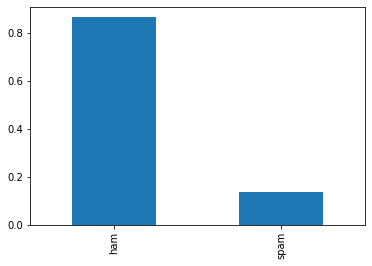

In [2]:
data['label'].value_counts(normalize = True).plot.bar()

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [4]:
lemmatizer = WordNetLemmatizer()
corp = []
txt = list(data['text']) 

for i in range(len(txt)):
  r = re.sub('[’a-zA-Z]',' ', txt[i]) 
  r = r.lower()
  r = r.split()
  r = [word for word in r if word not in stopwords.words('english')] 
  r = [lemmatizer.lemmatize(word) for word in r]
  r = ' ' .join(r)
  corp.append(r)

data['text']=corp
data.tail()

,label,text
5567,spam,"2 2 . å£750 . 2 , 087187272008 1! 10 . - - ."
5568,ham,ì_ ?
5569,ham,", * . ... ?"
5570,ham,'
5571,ham,.


In [5]:
from sklearn.model_selection import train_test_split

X = data['text'] 
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=123)

print('Training Data: ', X_train.shape) 
print('Testing Data: ', X_test.shape)

Training Data:  (4457,)
Testing Data:  (1115,)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(4457, 618)

In [7]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train_cv, Y_train)
X_test_cv = cv.transform(X_test)
predictions = lr.predict(X_test_cv)

lr.score(X_test_cv,Y_test)

0.9524663677130045

In [8]:
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(Y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

print(df)

      ham  spam
ham   981     1
spam   52    81
